In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from models import cross_val_bayes, bayes_model_conf_matrix

%matplotlib inline

# Modelling and Model Analysis

This section we will be exploring the different features for the Bayes Classifer. First, looking into the over accuracy of the models using cross validation. Then once features have been experimented with, a deeper look into model performance will be done using confusion matrixes.

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'tenure', 'monthly_charges', 'churn', 'internet_dsl',
       'internet_fiber', 'internet_no', 'tech_support_no', 'tech_support_yes',
       'contract_monthly', 'contract_1_year', 'contract_2_year'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,tenure,monthly_charges,churn,internet_dsl,internet_fiber,internet_no,tech_support_no,tech_support_yes,contract_monthly,contract_1_year,contract_2_year
0,0,1,29.85,0,1,0,0,1,0,1,0,0
1,1,34,56.95,0,1,0,0,1,0,0,1,0
2,2,2,53.85,1,1,0,0,1,0,1,0,0
3,3,45,42.30,0,1,0,0,0,1,0,1,0
4,4,2,70.70,1,0,1,0,1,0,1,0,0


# Feature Engineering

This section will be exploring different X features and trying to find the most accurate model for predicting churn customers. 


In [5]:
x = df[["tenure", "monthly_charges", "internet_dsl", "internet_fiber", "internet_no",
        "tech_support_no", "tech_support_yes", "contract_monthly", 
        "contract_1_year", "contract_2_year"]]
y = df["churn"]

result_all_features = cross_val_bayes(x, y)

print(result_all_features)

0.73


In [6]:
x = df[["tenure", "monthly_charges"]]
y = df["churn"]

result_2_features = cross_val_bayes(x, y)

print(result_2_features)

0.78


In [7]:
x = df[["tenure", "monthly_charges", "contract_monthly", "contract_1_year", "contract_2_year"]]
y = df["churn"]

result_5_features = cross_val_bayes(x, y)

print(result_5_features)

0.66


In [8]:
x = df[["tenure", "monthly_charges", "internet_dsl", "internet_fiber", "internet_no"]]
y = df["churn"]

result_internet_features = cross_val_bayes(x, y)

print(result_internet_features)

0.75


In [9]:
x = df[["tenure", "monthly_charges", "internet_dsl", "internet_fiber", "internet_no",
        "tech_support_no", "tech_support_yes"]]
y = df["churn"]

result_7_features = cross_val_bayes(x, y)

print(result_7_features)

0.73


In [10]:
x = df[["tenure", "monthly_charges", "internet_dsl", "internet_fiber", "internet_no",
        "contract_monthly", "contract_1_year", "contract_2_year"]]
y = df["churn"]

result_8_features = cross_val_bayes(x, y)

print(result_8_features)

0.71


In [11]:
x = df[["tenure", "monthly_charges", "tech_support_no", "tech_support_yes"]]
y = df["churn"]

result_4_features = cross_val_bayes(x, y)

print(result_4_features)

0.74


The model that used all features had an accuracy of 73%, which was the first model tested. The model that performed considerable better than all other models was the most simple model, which only used tenure and monthly charges. It had an accuracy of 78%. When combined with an additional feature the model performed worse. We can now take the top 2/3 models and analyse them in more depth. We need to explore the confusion matrix before we can draw conclusions on the best features to use. 

In [12]:
matrix_2_features = bayes_model_conf_matrix(df, ["tenure", "monthly_charges"], "churn")

In [13]:
matrix_2_features

array([[966,  70],
       [214, 159]], dtype=int64)

In [14]:
matrix_5_features = bayes_model_conf_matrix(df, ["tenure", "monthly_charges", "internet_dsl", "internet_fiber", 
                                                 "internet_no"], "churn")
matrix_5_features

array([[834, 202],
       [130, 243]], dtype=int64)

In [15]:
matrix_all_features = bayes_model_conf_matrix(df, ["tenure", "monthly_charges", "internet_dsl", "internet_fiber", 
                                                   "internet_no", "tech_support_no", "tech_support_yes", 
                                                   "contract_monthly", "contract_1_year", "contract_2_year"], 
                                                   "churn")
matrix_all_features

array([[742, 294],
       [ 70, 303]], dtype=int64)

### Displaying Matrixes

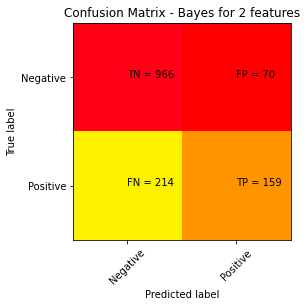

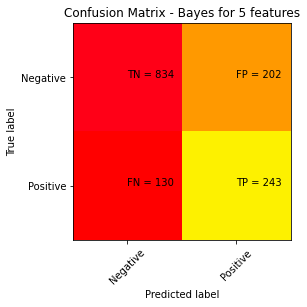

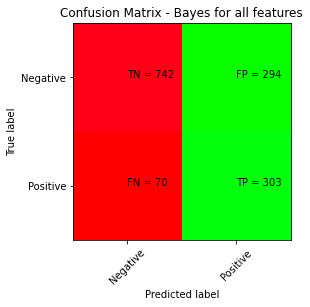

In [16]:
# Matrix 2 features
plt.clf()
plt.imshow(matrix_2_features, interpolation='nearest', cmap=plt.cm.hsv)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Bayes for 2 features')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrix_2_features[i][j]))
plt.show()

# Matrix 5 features
plt.clf()
plt.imshow(matrix_5_features, interpolation='nearest', cmap=plt.cm.hsv)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Bayes for 5 features')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrix_5_features[i][j]))
plt.show()

#Matrix all features
plt.clf()
plt.imshow(matrix_all_features, interpolation='nearest', cmap=plt.cm.hsv)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Bayes for all features')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrix_all_features[i][j]))
plt.show()

As we can see from the matrixes above, the results vary a lot when we dig deeper into the accuracy of the models. The best overall performing model had the least amount of True Positives. In this case, true negative is when the customer did not churn and the model correctly predicted (top left). False positive was when the model predicted a churn customer but they were in the no churn group (top right). False negative is when the model predicted no churn but the customer was in the churn group (bottom left). True positive was when the customer was in the churn group and the model correctly predicted them (bottom right). 

So in this model, true positive is very important because we want to know what customers are at risk of churning. So the model with the highest true positive and lowest false negative (missed churn customers) is clearly the bottom matrix, which used all features. We can now take a quick look at the accuracy of each section. 

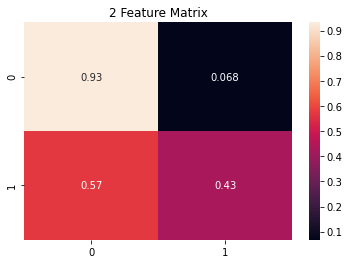

In [40]:
conf_mat_normalized = matrix_2_features.astype('float') / matrix_2_features.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized, annot=True, )
plt.title("2 Feature Matrix");
plt.show()

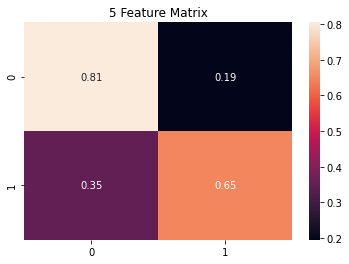

In [41]:
conf_mat_normalized_5 = matrix_5_features.astype('float') / matrix_5_features.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized_5, annot=True, )
plt.title("5 Feature Matrix")
plt.show()

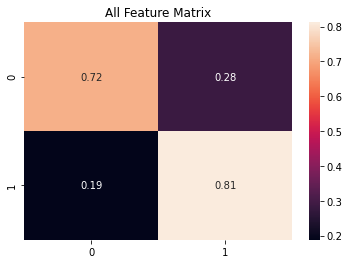

In [42]:
conf_mat_normalized_all = matrix_all_features.astype('float') / matrix_all_features.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized_all, annot=True, )
plt.title("All Feature Matrix")
plt.show()

As we can tell from the 2 feature matrix, the majority of the overall accuarcy is coming from the top left, true negative prediction. Which in this case, isn't too usual as the majority of the data is for no churn customers. The best model would be to use all features, as it has the least "misses" and predicts the churn customers the best. The downside to this model, is that it is way over predicting on the no churn customers. This could potentially increase marketing costs if the company was to target potential churn customers but the benefit of the churn accuracy will outweigh this problem.